In [15]:
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from gensim.models import KeyedVectors, Word2Vec
from sklearn.decomposition import PCA, TruncatedSVD

data_path = Path("..") / "data"
# results_path = data_path / "results" / f"word2vec_warmstarted_trained_embeddings_300d_50epochs.txt"
results_path = data_path / "results" / f"word2vec_warmstarted_trained_embeddings_300d_epoch2.txt"

In [2]:
wv = KeyedVectors.load_word2vec_format(results_path, binary=False)

In [14]:
wv.most_similar(positive = ["woman", "rei"], negative = ["man"])

[(&#39;rainha&#39;, 0.5084500908851624),
 (&#39;king&#39;, 0.502537727355957),
 (&#39;princesa&#39;, 0.45114755630493164),
 (&#39;imperador&#39;, 0.4011966586112976),
 (&#39;mulher&#39;, 0.3787573575973511),
 (&#39;monarca&#39;, 0.36473342776298523),
 (&#39;monarquia&#39;, 0.3645899295806885),
 (&#39;faraó&#39;, 0.36307698488235474),
 (&#39;príncipe&#39;, 0.3616994619369507),
 (&#39;coroa&#39;, 0.3602984845638275)]

In [21]:
wv.most_similar(positive = ["woman", "king"], negative = ["man"])

[(&#39;queen&#39;, 0.4350655674934387),
 (&#39;rei&#39;, 0.4241540729999542),
 (&#39;daughter&#39;, 0.4114684760570526),
 (&#39;monarchy&#39;, 0.4002913236618042),
 (&#39;rainha&#39;, 0.39846694469451904),
 (&#39;princess&#39;, 0.39243143796920776),
 (&#39;princesa&#39;, 0.3749402165412903),
 (&#39;crown&#39;, 0.3663812279701233),
 (&#39;girl&#39;, 0.3653244376182556),
 (&#39;monarch&#39;, 0.36505311727523804)]

In [22]:
wv.most_similar(positive = ["mulher", "rei"], negative = ["homem"])

[(&#39;rainha&#39;, 0.5440312623977661),
 (&#39;king&#39;, 0.5061456561088562),
 (&#39;princesa&#39;, 0.4973145127296448),
 (&#39;prússia&#39;, 0.41942697763442993),
 (&#39;princess&#39;, 0.40250736474990845),
 (&#39;filha&#39;, 0.40121379494667053),
 (&#39;avó&#39;, 0.39817386865615845),
 (&#39;daughter&#39;, 0.3964507579803467),
 (&#39;coroação&#39;, 0.39234477281570435),
 (&#39;monarquia&#39;, 0.3828026056289673)]

In [17]:
def reduce_to_k_dim(M, k=2):
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    # ------------------
    # Write your implementation here.
    svd = TruncatedSVD(n_components=k, n_iter=n_iters, random_state=42)
    svd.fit(M)
    M_reduced = svd.transform(M)
    # ------------------

    print("Done.")
    return M_reduced

In [19]:
svd_result = reduce_to_k_dim(wv[wv.vocab])
svd_embeddings = dict(zip(list(wv.vocab.keys()), svd_result))

Running Truncated SVD over 188628 words...
Done.


In [3]:
X = wv[wv.vocab]
pca = PCA(n_components=5)
pca_result = pca.fit_transform(X)
pca_embeddings = dict(zip(list(wv.vocab.keys()), pca_result))

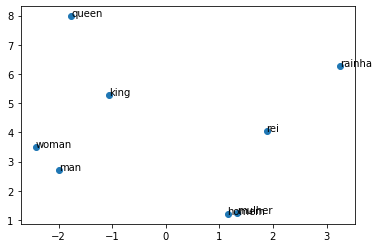

In [4]:
plot_words = ["man", "woman", "king", "queen", "homem", "mulher", "rei", "rainha"]

plot_data = []
for word in plot_words:
    plot_data.append(pca_embeddings[word])
plot_data = np.array(plot_data)
plt.scatter(plot_data[:, 0], plot_data[:, 1])

for i, word in enumerate(plot_words):
    plt.annotate(word, xy=(plot_data[i, 0], plot_data[i, 1]))